* ref : https://www.kofiabond.or.kr/

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

# 미국 국채금리

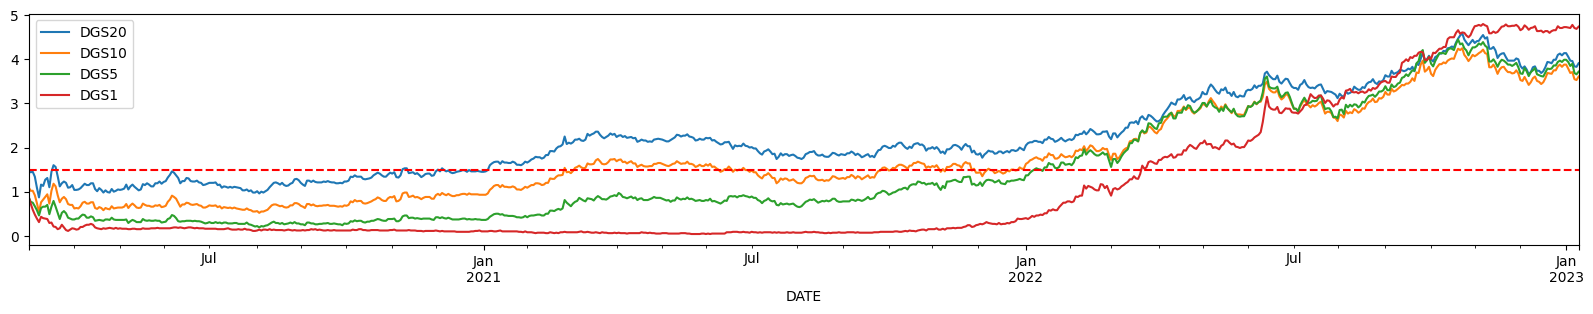

In [7]:
#미국 국채 금리(20년, 10년, 5년, 1년)
DGS = fdr.DataReader(['DGS20','DGS10','DGS5','DGS1'], start='2020-03-01', data_source='fred') 
graph= DGS.plot()
graph.axhline(1.5, ls='--', color='r')

# 장단기 금리 역전
* 장단기 금리차 = 장기금리(10년물 국채 수익률) – 단기금리(2년물 국채 수익률)
* 금리역전 후 스프레드 격차가 심할 때 금융위기

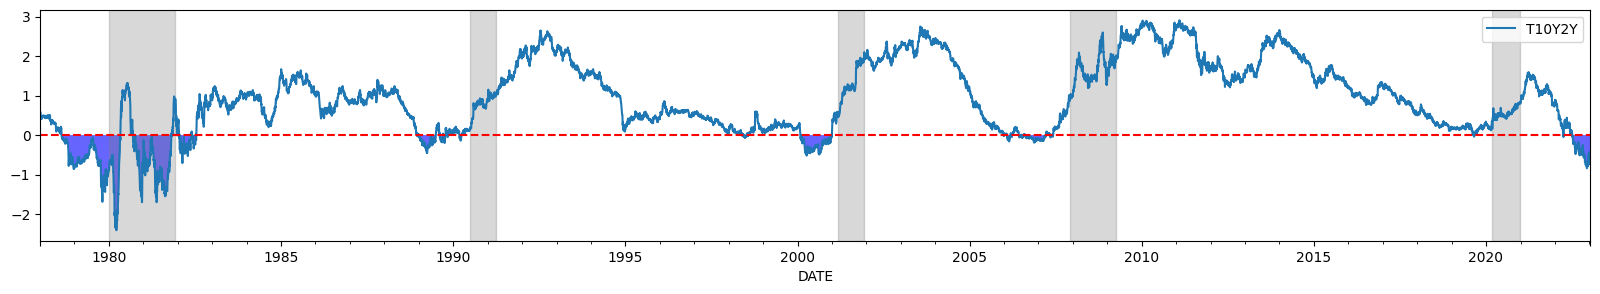

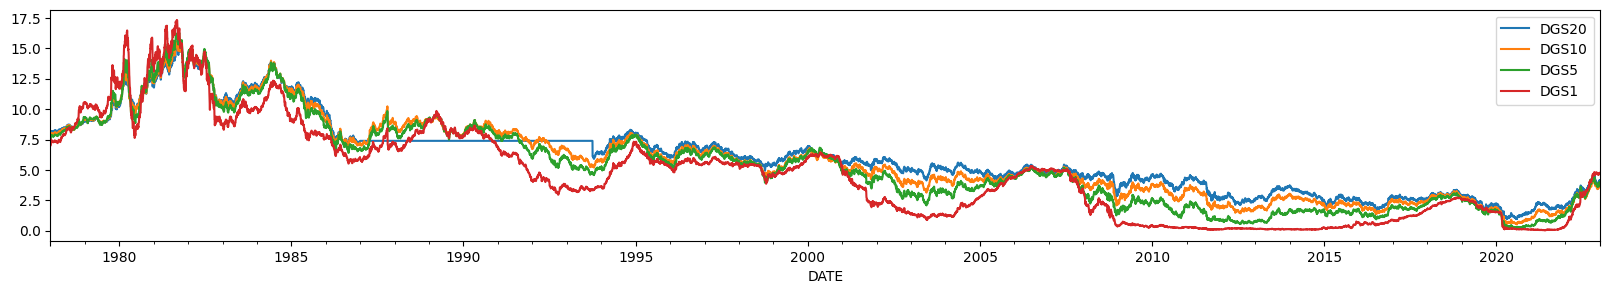

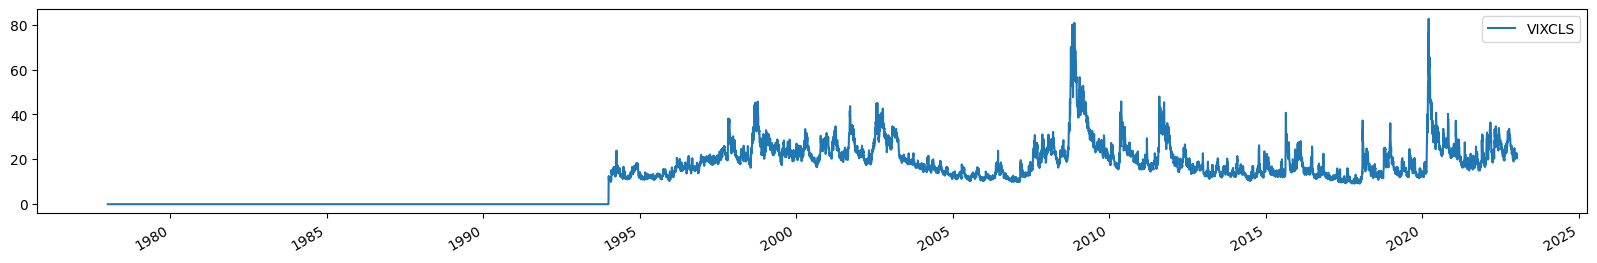

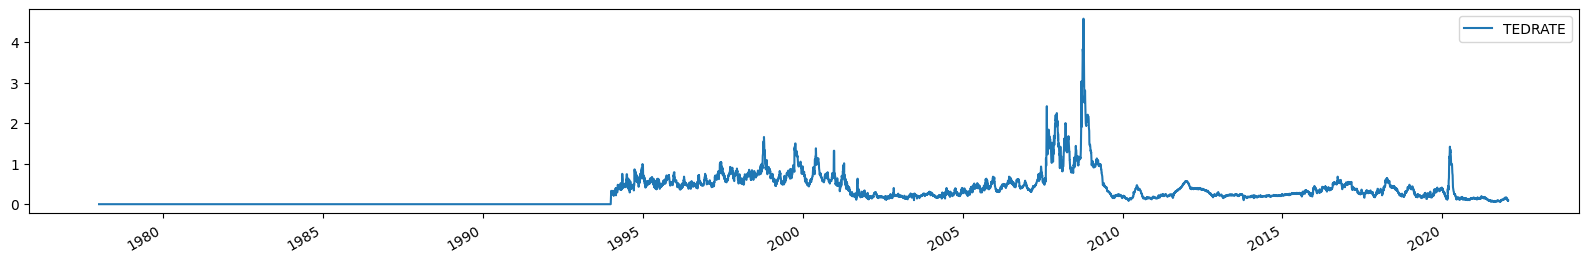

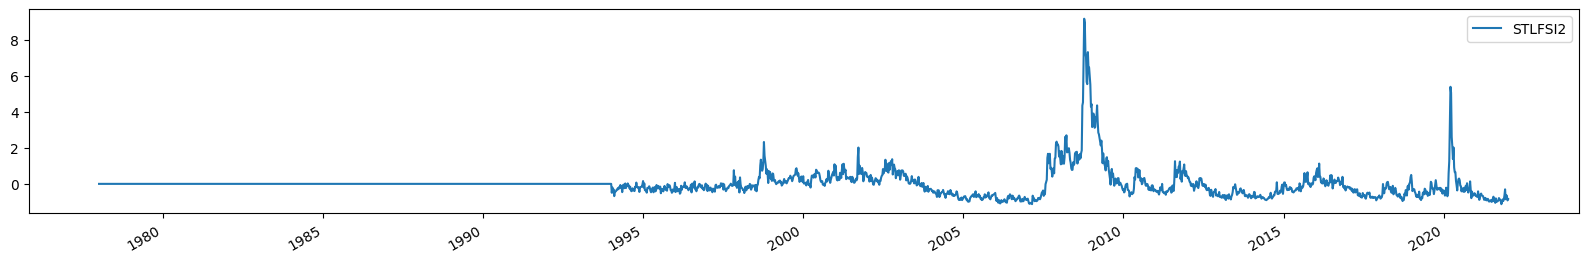

In [8]:
df102 = fdr.DataReader('T10Y2Y', start='1978-01-01', data_source='fred')
graph= df102.plot()              #장단기 금리차(T10Y2Y) 데이터 가져오기
fdr.DataReader(['DGS20','DGS10','DGS5','DGS1'], start='1978-01-01', data_source='fred').plot() 

# fdr.DataReader('USD/KRW', start='2019-01-01')#미국 달러/한국 원(원달러)

dummy = pd.DataFrame(index=pd.date_range(start='1978-01-01', end='1993-12-31'))
pd.concat([dummy, fdr.DataReader('VIXCLS',  start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #VIX(변동성 지수)
pd.concat([dummy, fdr.DataReader('TEDRATE', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #TED Spread(금융신용경색)
pd.concat([dummy, fdr.DataReader('STLFSI2', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #금융스트레스 지수

graph.axhline(0, ls='--', color='r')   #0선
#graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] > 0, facecolor='r', alpha=0.6, interpolate=True)
graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] <= 0, facecolor='b', alpha=0.6, interpolate=True)

#-----------------------------------------------------------------------------
#경제 위기
#-----------------------------------------------------------------------------
#1929~1933 대공항
#1974오일쇼크
graph.axvspan('1980-01-01', '1981-12-01', color='gray', alpha=0.3) #1980 시장혼란
                                                                   #1987블랙먼데이
graph.axvspan('1990-07-01', '1991-04-01', color='gray', alpha=0.3) #1991미,북유럽,일S&L(저축대부조합)금융기관 도산
                                                                   #1997~아시아부도
graph.axvspan('2001-03-01', '2001-12-01', color='gray', alpha=0.3) #2001닷컴버블,911
graph.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.3) #2008서브프라임모기지사태
graph.axvspan('2020-03-01', '2020-12-30', color='gray', alpha=0.3) #2020코로나
 
plt.show()
# 금리역전 후 스프레드 격차가 심할 때 금융위기